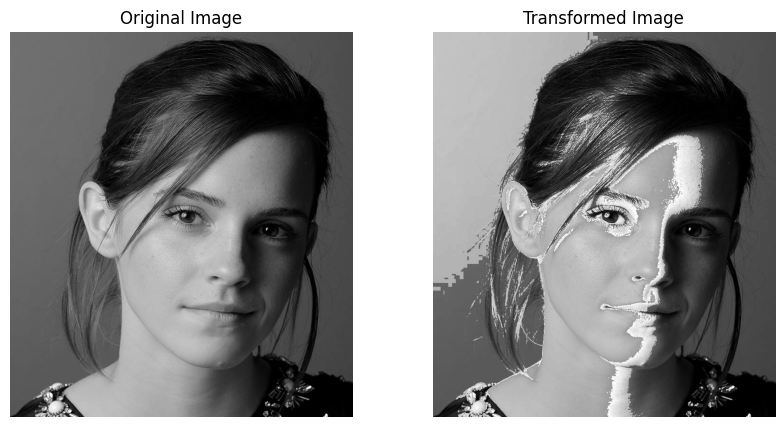

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image (Fig. 1b)
img = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

# Define the intensity transformation function
def intensity_transformation(input_intensity):
    if input_intensity < 100:
        return input_intensity  # Linear with slope 1
    # 2.5 * input_intensity  # Linear with slope 2.5
    elif input_intensity <= 150:
        return input_intensity*1.55 + 22.5
    else:
        return input_intensity  # Linear with slope 1

# Apply the intensity transformation to the image
transformed_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        transformed_img[i, j] = intensity_transformation(img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


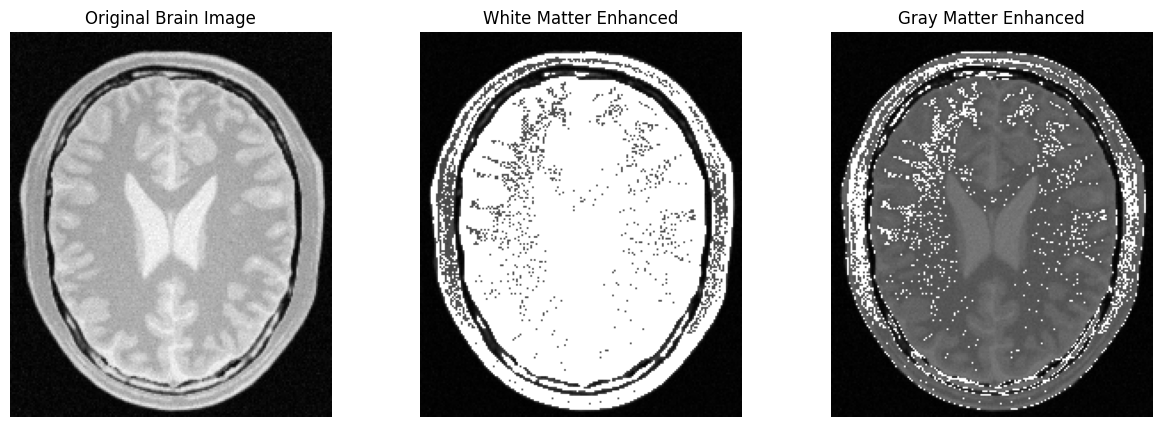

In [3]:
# Load the brain proton density image (Fig. 2)
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

# Define intensity transformation for white and gray matter
# You may need to tune the values for white and gray matter intensity ranges based on the image

def transform_for_white_matter(input_intensity):
    if input_intensity >= 160:  # White matter is typically in higher intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

def transform_for_gray_matter(input_intensity):
    if 100 <= input_intensity < 160:  # Gray matter intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

# Apply transformations for both white and gray matter
white_matter_img = np.zeros_like(brain_img)
gray_matter_img = np.zeros_like(brain_img)

for i in range(brain_img.shape[0]):
    for j in range(brain_img.shape[1]):
        white_matter_img[i, j] = transform_for_white_matter(brain_img[i, j])
        gray_matter_img[i, j] = transform_for_gray_matter(brain_img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(brain_img, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_img, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_img, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.show()
